In [1]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# Dataset dan Dataloader

In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
bs = 128
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("data/train/", transform=transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True)

test_set = datasets.ImageFolder("data/test/", transform=transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

In [39]:
feature, target = next(iter(trainloader))
images.shape

torch.Size([128, 1, 28, 28])

In [16]:
label2cat = train_set.classes
label2cat

['Ankle boot',
 'Bag',
 'Coat',
 'Dress',
 'Pullover',
 'Sandal',
 'Shirt',
 'Sneaker',
 'T-shirt or Top',
 'Trouser']

# Arsitekstur & Config

In [17]:
from jcopdl.layers import linear_block

In [18]:
class FashionClassifier(nn.Module):
    def __init__(self, input_size, n1, n2, output_size, dropout=0.2):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            linear_block(input_size, n1, dropout=dropout),
            linear_block(n1, n2, dropout=dropout),
            linear_block(n2, output_size, activation='lsoftmax')
        )
    def forward(self, x):
        return self.fc(x)

In [19]:
configs = set_config({
    "input_size" : 784,
    "n1" : 256,
    "n2" : 64,
    "output_size" : len(train_set.classes),
    "dropout" : 0.2
})

In [20]:
input_size = 784
n1 = 256
n2 = 64
output_size = len(train_set.classes)
dropout = 0.2

# Training Preparation -> MCOC

In [25]:
model = FashionClassifier(input_size, n1, n2, output_size, dropout).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config=configs, outdir="model")

# Training

In [22]:
from tqdm.auto import tqdm
def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature) # feedforward
        loss = criterion(output, target)
        if mode == "train":
            loss.backward() # backpropragation
            optimizer.step() # update weight
            optimizer.zero_grad()
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc

Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 0.7394 | Test_cost  = 0.4752 | Train_score = 0.7389 | Test_score = 0.8306 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.4788 | Test_cost  = 0.4010 | Train_score = 0.8294 | Test_score = 0.8538 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.4220 | Test_cost  = 0.3659 | Train_score = 0.8493 | Test_score = 0.8663 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.3909 | Test_cost  = 0.3606 | Train_score = 0.8608 | Test_score = 0.8671 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.3681 | Test_cost  = 0.3529 | Train_score = 0.8679 | Test_score = 0.8714 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.3533 | Test_cost  = 0.3440 | Train_score = 0.8728 | Test_score = 0.8703 |
==> EarlyStop patience =  1 | Best test_score: 0.8714


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.3372 | Test_cost  = 0.3428 | Train_score = 0.8802 | Test_score = 0.8743 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.3272 | Test_cost  = 0.3360 | Train_score = 0.8834 | Test_score = 0.8752 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.3215 | Test_cost  = 0.3252 | Train_score = 0.8840 | Test_score = 0.8830 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.3112 | Test_cost  = 0.3246 | Train_score = 0.8882 | Test_score = 0.8827 |
==> EarlyStop patience =  1 | Best test_score: 0.8830


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.2984 | Test_cost  = 0.3188 | Train_score = 0.8923 | Test_score = 0.8848 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.2923 | Test_cost  = 0.3108 | Train_score = 0.8928 | Test_score = 0.8855 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.2892 | Test_cost  = 0.3096 | Train_score = 0.8948 | Test_score = 0.8855 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.2798 | Test_cost  = 0.3162 | Train_score = 0.8975 | Test_score = 0.8836 |
==> EarlyStop patience =  1 | Best test_score: 0.8855


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.2737 | Test_cost  = 0.3134 | Train_score = 0.8998 | Test_score = 0.8848 |
==> EarlyStop patience =  2 | Best test_score: 0.8855


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.2689 | Test_cost  = 0.3105 | Train_score = 0.9013 | Test_score = 0.8891 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.2628 | Test_cost  = 0.3093 | Train_score = 0.9025 | Test_score = 0.8901 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.2580 | Test_cost  = 0.3263 | Train_score = 0.9043 | Test_score = 0.8799 |
==> EarlyStop patience =  1 | Best test_score: 0.8901


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.2537 | Test_cost  = 0.3036 | Train_score = 0.9061 | Test_score = 0.8912 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.2467 | Test_cost  = 0.3050 | Train_score = 0.9078 | Test_score = 0.8912 |


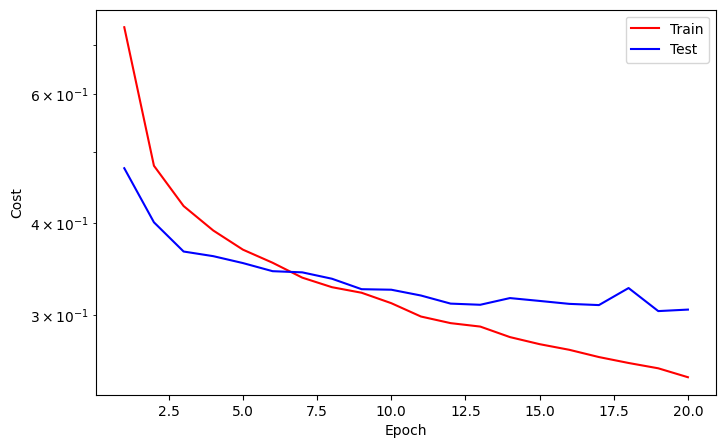

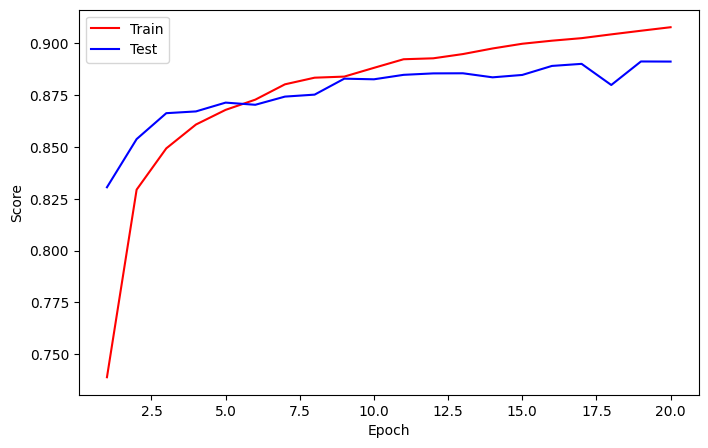

==> EarlyStop patience =  1 | Best test_score: 0.8912


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.2404 | Test_cost  = 0.3136 | Train_score = 0.9098 | Test_score = 0.8889 |
==> EarlyStop patience =  2 | Best test_score: 0.8912


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.2394 | Test_cost  = 0.3051 | Train_score = 0.9113 | Test_score = 0.8919 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.2365 | Test_cost  = 0.3042 | Train_score = 0.9113 | Test_score = 0.8920 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.2317 | Test_cost  = 0.3057 | Train_score = 0.9128 | Test_score = 0.8903 |
==> EarlyStop patience =  1 | Best test_score: 0.8920


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.2265 | Test_cost  = 0.3285 | Train_score = 0.9141 | Test_score = 0.8854 |
==> EarlyStop patience =  2 | Best test_score: 0.8920


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    26
Train_cost  = 0.2272 | Test_cost  = 0.3075 | Train_score = 0.9141 | Test_score = 0.8922 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    27
Train_cost  = 0.2221 | Test_cost  = 0.3095 | Train_score = 0.9165 | Test_score = 0.8932 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    28
Train_cost  = 0.2171 | Test_cost  = 0.3052 | Train_score = 0.9164 | Test_score = 0.8927 |
==> EarlyStop patience =  1 | Best test_score: 0.8932


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    29
Train_cost  = 0.2118 | Test_cost  = 0.3069 | Train_score = 0.9192 | Test_score = 0.8938 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    30
Train_cost  = 0.2137 | Test_cost  = 0.3181 | Train_score = 0.9203 | Test_score = 0.8888 |
==> EarlyStop patience =  1 | Best test_score: 0.8938


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    31
Train_cost  = 0.2097 | Test_cost  = 0.3146 | Train_score = 0.9213 | Test_score = 0.8918 |
==> EarlyStop patience =  2 | Best test_score: 0.8938


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    32
Train_cost  = 0.2063 | Test_cost  = 0.3239 | Train_score = 0.9226 | Test_score = 0.8931 |
==> EarlyStop patience =  3 | Best test_score: 0.8938


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    33
Train_cost  = 0.2031 | Test_cost  = 0.3190 | Train_score = 0.9238 | Test_score = 0.8925 |
==> EarlyStop patience =  4 | Best test_score: 0.8938


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    34
Train_cost  = 0.2029 | Test_cost  = 0.3145 | Train_score = 0.9247 | Test_score = 0.8958 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    35
Train_cost  = 0.1979 | Test_cost  = 0.3231 | Train_score = 0.9258 | Test_score = 0.8929 |
==> EarlyStop patience =  1 | Best test_score: 0.8958


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    36
Train_cost  = 0.1960 | Test_cost  = 0.3193 | Train_score = 0.9255 | Test_score = 0.8943 |
==> EarlyStop patience =  2 | Best test_score: 0.8958


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    37
Train_cost  = 0.1922 | Test_cost  = 0.3196 | Train_score = 0.9289 | Test_score = 0.8913 |
==> EarlyStop patience =  3 | Best test_score: 0.8958


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    38
Train_cost  = 0.1908 | Test_cost  = 0.3220 | Train_score = 0.9274 | Test_score = 0.8943 |
==> EarlyStop patience =  4 | Best test_score: 0.8958


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    39
Train_cost  = 0.1868 | Test_cost  = 0.3245 | Train_score = 0.9293 | Test_score = 0.8953 |
==> EarlyStop patience =  5 | Best test_score: 0.8958
==> Execute Early Stopping at epoch: 39 | Best test_score: 0.8958
==> Best model is saved at model


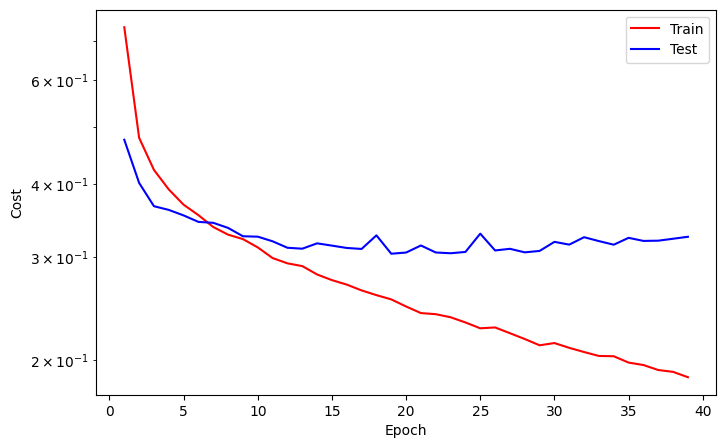

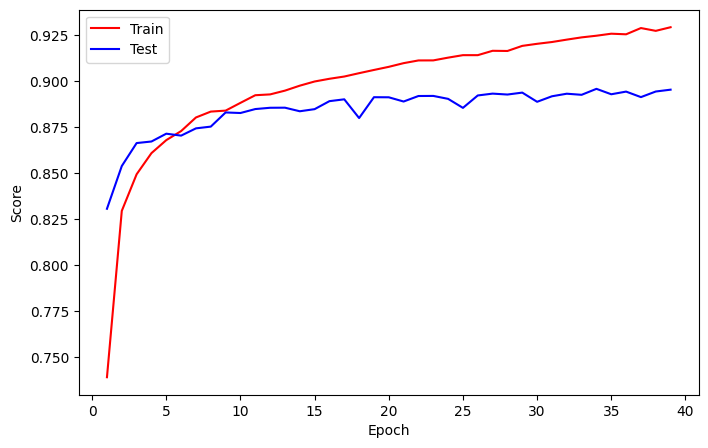

In [26]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)
    # Save CheckPoint
    callback.save_checkpoint()

    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

# Load Best Model

In [28]:
weights = torch.load("model/weights_best.pth", map_location='cpu')
configs = torch.load("model/configs.pth", map_location='cpu')
model = FashionClassifier(input_size, n1, n2, output_size, dropout).to(device)
model.load_state_dict(weights)

/tmp/ipykernel_65203/3615460720.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load("model/weights_best.pth", map_location='cpu')
/tmp/ipykernel_65203/3

<All keys matched successfully>

# Predict

In [40]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device) 

In [33]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
preds

tensor([9, 0, 6, 6, 8, 8, 5, 4, 7, 6, 6, 7, 0, 2, 4, 9, 5, 3, 0, 6, 9, 1, 5, 6,
        7, 2, 3, 7, 8, 8, 6, 3, 9, 7, 4, 2, 6, 8, 7, 7, 6, 8, 6, 6, 4, 3, 6, 2,
        1, 2, 2, 2, 7, 1, 3, 0, 9, 4, 6, 0, 6, 0, 3, 2, 4, 9, 1, 3, 0, 0, 8, 0,
        1, 9, 6, 7, 3, 2, 2, 5, 5, 2, 4, 7, 0, 3, 3, 0, 5, 7, 1, 7, 6, 2, 4, 3,
        6, 8, 9, 0, 1, 9, 0, 0, 7, 2, 9, 3, 8, 3, 3, 3, 3, 6, 5, 7, 9, 5, 8, 6,
        2, 8, 0, 5, 8, 2, 6, 5], device='cuda:0')

In [34]:
label2cat[9]

'Trouser'

# Visualization

In [35]:
import matplotlib.pyplot as plt

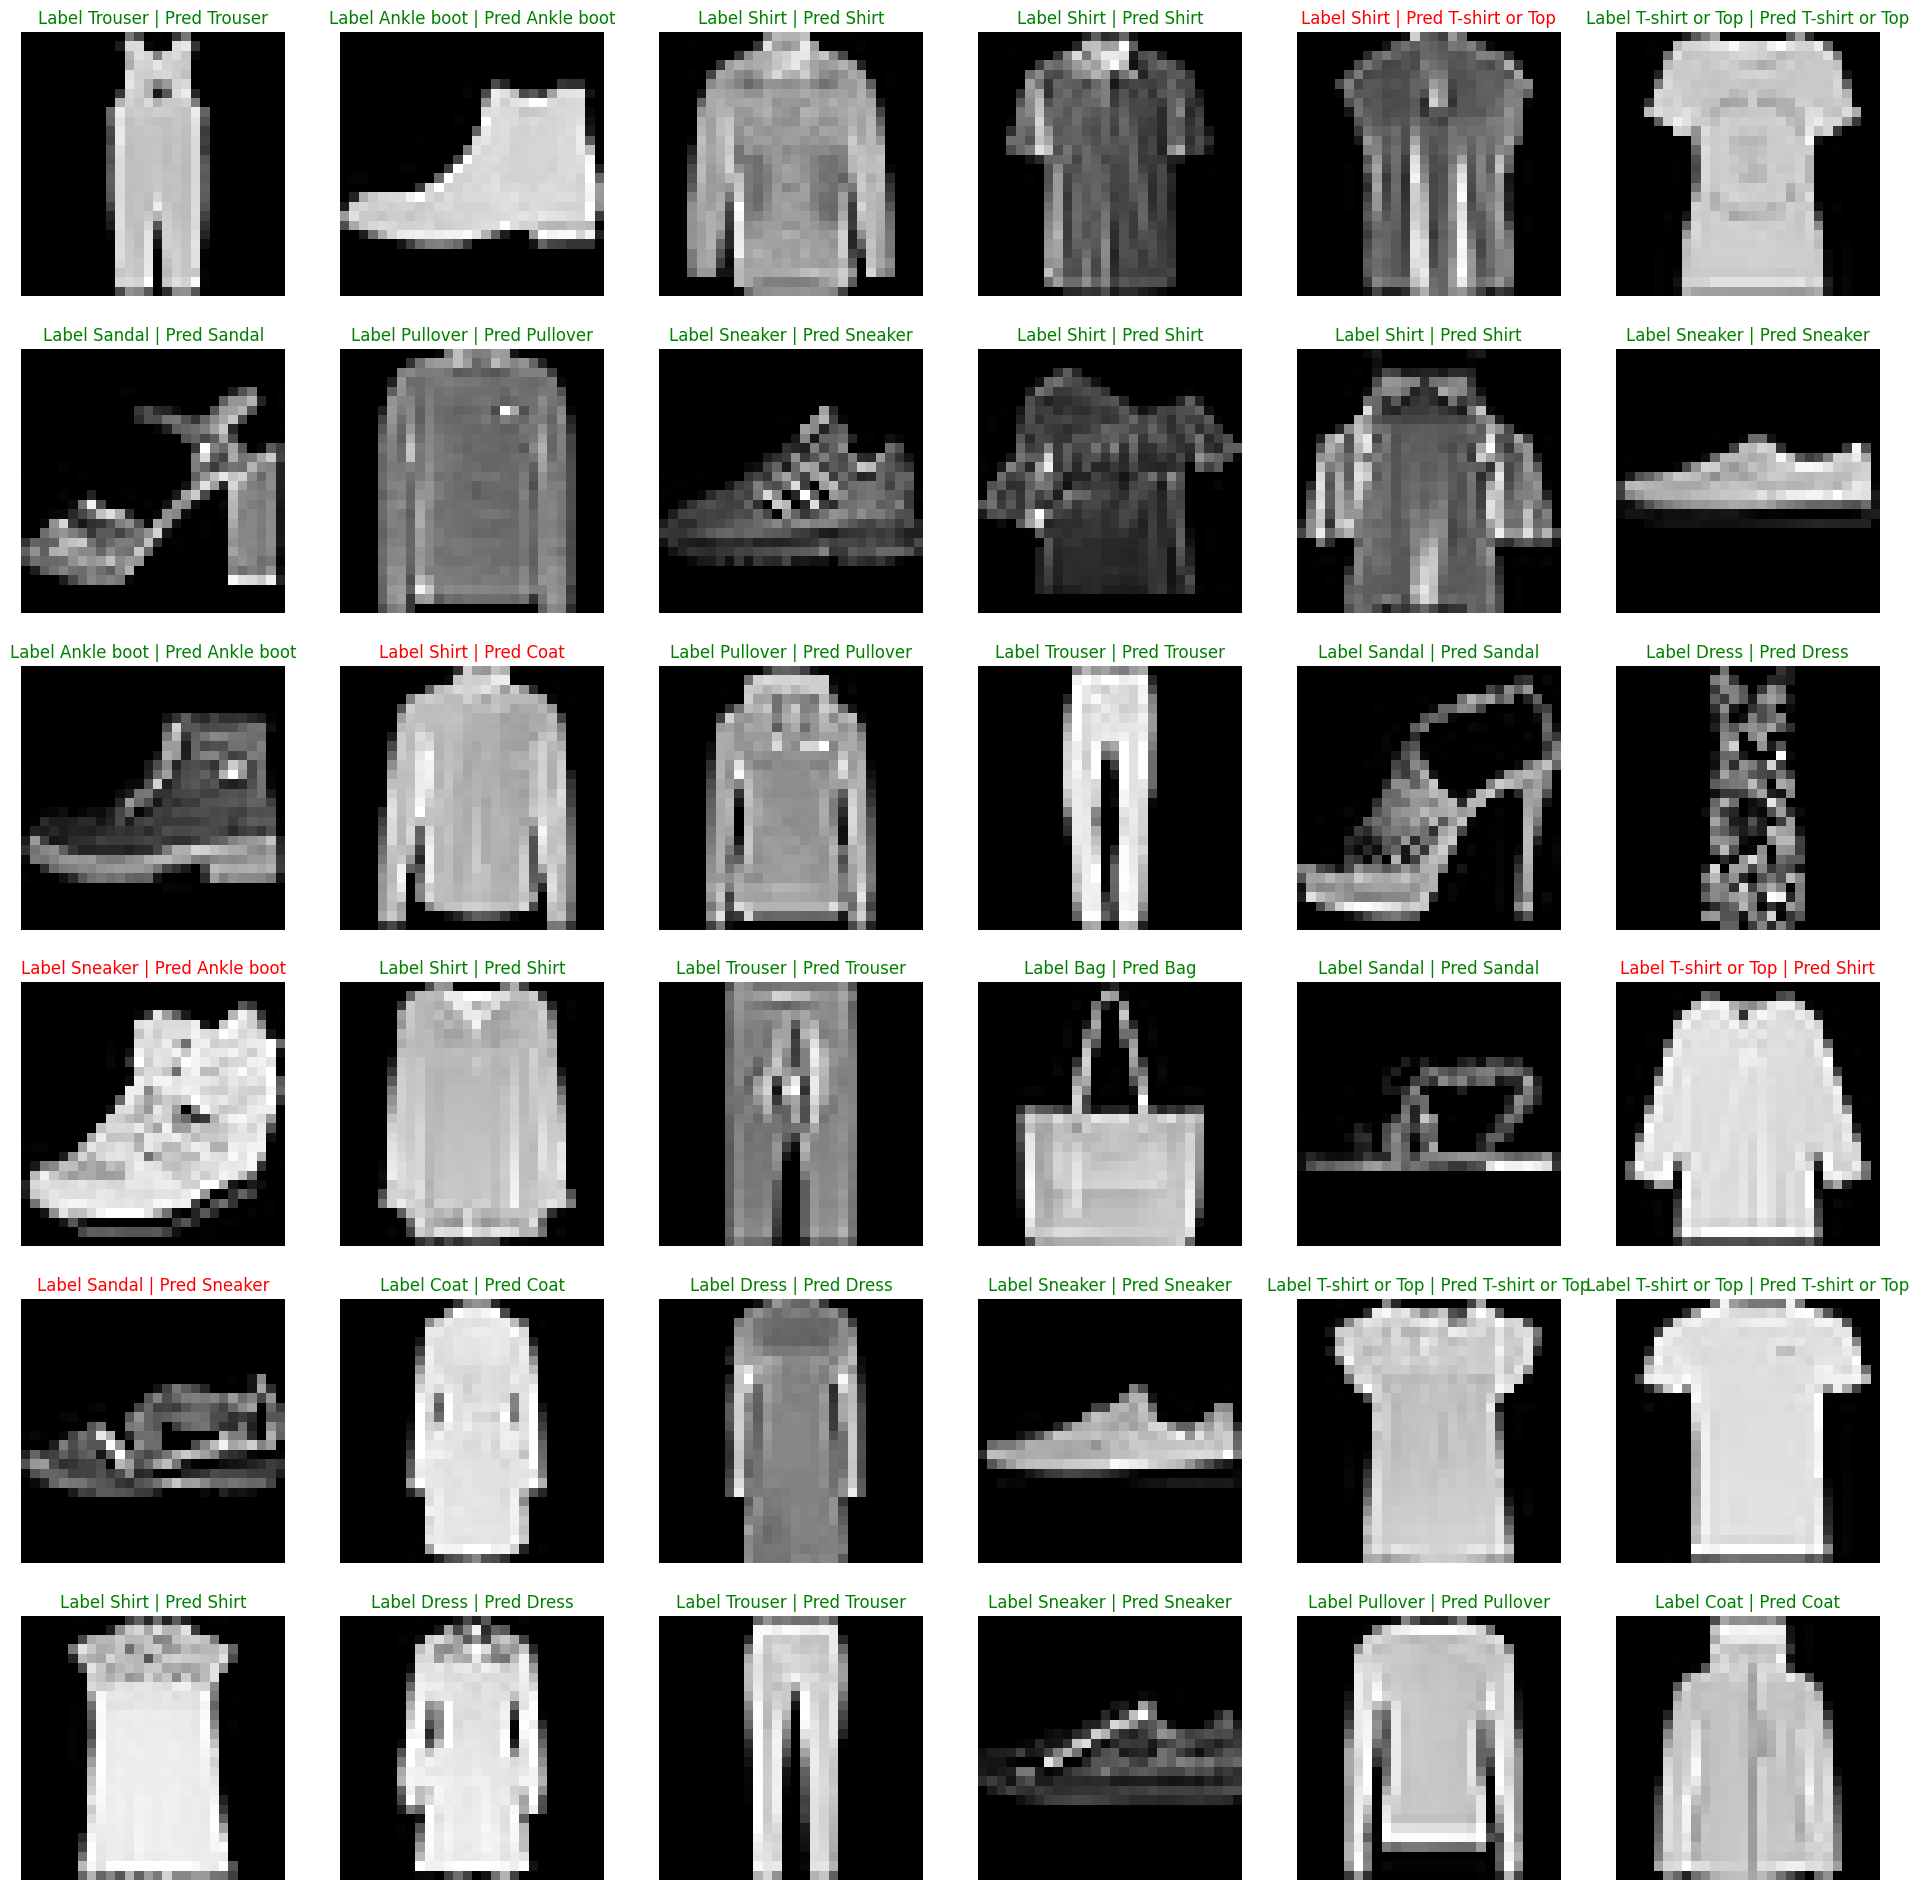

In [38]:
fig, axes = plt.subplots(6, 6, figsize=(24,24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(img.view(28,28).cpu(), cmap="gray")
    font = {"color" : "r" if label != pred else "g"}
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f"Label {label} | Pred {pred}", fontdict=font)
    ax.axis('off')